In [4]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.ibmq import least_busy
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-07-14 14:50:13,573: Credentials are already in use. The existing account in the session will be replaced.


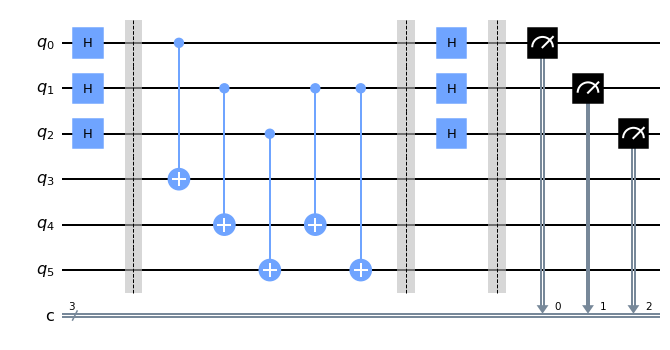

In [13]:
n = 3

q_simon = QuantumCircuit((2 * n), (n))

# Applying Hadamard on the first Quantum Register
for i in range(3):
    q_simon.h(i)
    
q_simon.barrier()

# We're going to use the given Oracle for now, we'll make our own later
q_simon.cx(0,3)
q_simon.cx(1,4)
q_simon.cx(2,5)
q_simon.cx(1,4)
q_simon.cx(1,5)

q_simon.barrier()

# Ideally we would measure q3, q4, and q5; but qiskit does all measurement at the end. Hence, we'll skip it
# Applying Hadamard on the first Quantum Register (again)
for i in range(3):
    q_simon.h(i)
    
q_simon.barrier()

# Finally, measure the first quantum register:
for i in range(3):
    q_simon.measure(i,i)
    

q_simon.draw()

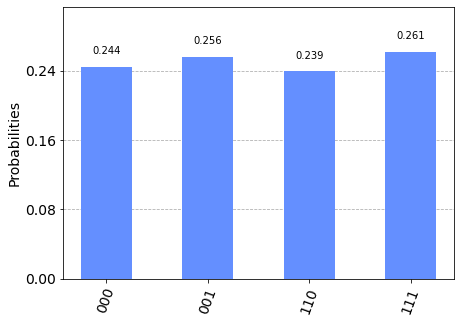

In [14]:
# Running on a simulator:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(q_simon, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

In [ ]:
# Running on actual Quantum Hardware:
from qiskit import IBMQ

provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibm_oslo')

# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

transpiled_q_simon = transpile(q_simon, backend, optimization_level=3)
job = backend.run(transpiled_q_simon)
job_monitor(job, interval=2)

ibmqfactory.load_account:WARNING:2022-07-14 15:04:18,047: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job is queued (15)    

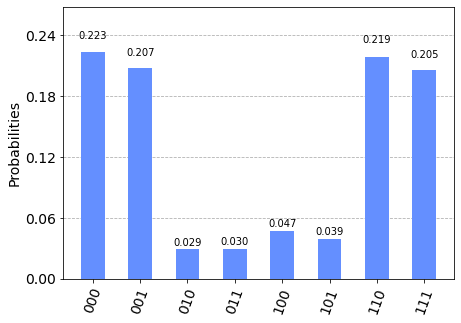

In [21]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

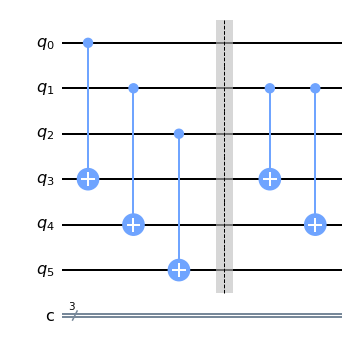

In [29]:
# Now we're going to implement our own Query Function/Oracle.
# For a given bitstring b:

b = '011'
n = 3

b = b[::-1]

qOracle = QuantumCircuit((2 * n), n)

# First thing we must do is copy the contents of the first register to the second register:
# This can be done with cx gates:
for i in range(n):
    qOracle.cx(i, (i+3))

qOracle.barrier()

# Now we must do a check to see if b is NOT all zeros, and perform some computations if this is the case:
if (b != '000'):
    
    # Check which the most significant bit of s is 1
    firstOneLocation = 0;
    for i in range(n):
        if(b[i] == '1'): firstOneLocation = i
    
    # And then contruct cNOT from this qubit to the 2nd register, only for corresponding bits of s that are 1
    for i in range(n):
        if(b[i] == '1'): qOracle.cx(firstOneLocation, (n + i))
        
    
    

    
    
qOracle.draw()

